In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
import itertools
import seaborn as sns
import math

#from yahoofinancials import YahooFinancials

In [2]:
import warnings

# Ignorar todos os avisos
warnings.filterwarnings("ignore")


referencia: https://www.anpec.org.br/revista/vol14/vol14n1p521_546.pdf


## conceitos chave

#### cointegração:
relação estatística onde duas séries temporais que são integradadas de mesma ordem $d$ podem ser combinadas linearmente
para produzirem uma única série integrada de ordem $d-b$, onde $(d > b > 0)$

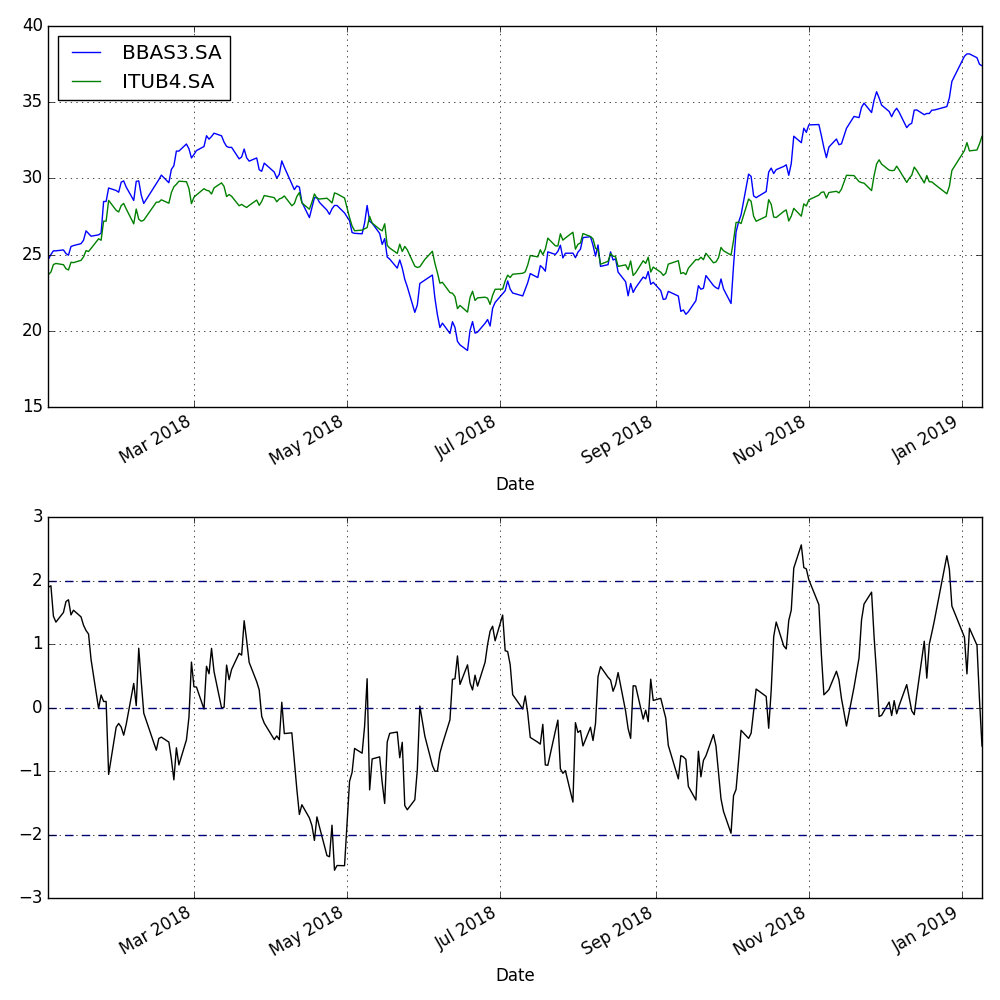

In [3]:
tickers_ibov = [
'ALPA4',
'ABEV3',
'AMER3',
'B3SA3',
'BPAN4',
'BBSE3',
'BRML3',
'BBDC3',
'BBDC4',
'BRAP4',
'BBAS3',
'BRKM5',
'BRFS3',
'CCRO3',
'FLRY3',
'GGBR4',
'GOAU4',
'GOLL4',
'HYPE3',
'IGTA3',
'ITSA4',
'ITUB4',
'JBSS3',
'JHSF3',
'KLBN11',
'RENT3',
'LCAM3',
'LAME4',
'LREN3',
'MGLU3',
'MRFG3',
'BEEF3',
'MRVE3',
'MULT3',
#'PCAR3',
'PETR3',
'PETR4',
'PRIO3',
'QUAL3',
'RADL3',
'RAIL3',
'SBSP3',
'SANB11',
'CSNA3',
'SULA11',
'SUZB3',
'TAEE11',
'VIVT3',
'TIMS3',
'TOTS3',
'UGPA3',
'USIM5',
'VALE3',
'VIIA3',
'WEGE3',
'YDUQ3',]


In [4]:
tickers_yf = [i + '.SA' for i in tickers_ibov]
ibov= yf.download(tickers_yf, start='2018-01-01', end='2024-01-01')

[*********************100%%**********************]  55 of 55 completed

6 Failed downloads:
['IGTA3.SA', 'LCAM3.SA', 'LAME4.SA', 'VIIA3.SA', 'BRML3.SA', 'SULA11.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [5]:
close_prices = ibov['Adj Close']

In [6]:
close_prices.drop(columns=['IGTA3.SA', 'VIIA3.SA', 'SULA11.SA', 'LAME4.SA', 'BRML3.SA', 'LCAM3.SA'], inplace=True)

In [7]:
close_prices.isna().sum()

Ticker
ABEV3.SA     0
ALPA4.SA     0
AMER3.SA     0
B3SA3.SA     0
BBAS3.SA     0
BBDC3.SA     0
BBDC4.SA     0
BBSE3.SA     0
BEEF3.SA     0
BPAN4.SA     0
BRAP4.SA     0
BRFS3.SA     0
BRKM5.SA     0
CCRO3.SA     0
CSNA3.SA     0
FLRY3.SA     0
GGBR4.SA     0
GOAU4.SA     0
GOLL4.SA     0
HYPE3.SA     0
ITSA4.SA     0
ITUB4.SA     0
JBSS3.SA     0
JHSF3.SA     0
KLBN11.SA    0
LREN3.SA     0
MGLU3.SA     0
MRFG3.SA     0
MRVE3.SA     0
MULT3.SA     0
PETR3.SA     0
PETR4.SA     0
PRIO3.SA     0
QUAL3.SA     0
RADL3.SA     0
RAIL3.SA     0
RENT3.SA     0
SANB11.SA    0
SBSP3.SA     0
SUZB3.SA     0
TAEE11.SA    0
TIMS3.SA     0
TOTS3.SA     0
UGPA3.SA     0
USIM5.SA     0
VALE3.SA     0
VIVT3.SA     0
WEGE3.SA     0
YDUQ3.SA     0
dtype: int64

In [8]:
def stationarity_bool(a, cutoff = 0.05):
  a = np.ravel(a)
  if adfuller(a)[1] < cutoff:
    return True
  else:
    return False

  ## OLS implementation
def ols(y, x):

  """
  ordinary least squares regression function
  """
  n = len(x)
  beta = (n*np.sum(x * y)-np.sum(y)*np.sum(x)  )/( n*np.sum(x**2) - np.sum(x)**2 )

  alpha = np.mean(y) - beta* np.mean(x)

  resid = y - (beta*x + alpha)
  return beta, alpha, resid

def calc_half_life(resid):
  lag_resid = resid.shift(1).bfill()
  delta_resid = resid  - lag_resid

  beta, alpha, resid = ols(delta_resid, lag_resid)
  half = -1* np.log(2)/beta
  return half

In [15]:
base_treino = close_prices.loc['2020':'2021-01-01']
base_teste = close_prices.loc['2021-01-01':'2024-01-01']

In [10]:
pares_cointegrados = []
all_pairs =  list(itertools.combinations(base_treino.columns,2))
print(all_pairs)
for pair in all_pairs:
  beta, alpha, resid = ols(base_treino[pair[0]], base_treino[pair[1]])

  if stationarity_bool(resid):
    meia_vida = calc_half_life(resid)
    pares_cointegrados.append([pair[0], pair[1], meia_vida])

print('total_de_pares', len(all_pairs))
print('pares_coint', len(pares_cointegrados))

[('ABEV3.SA', 'ALPA4.SA'), ('ABEV3.SA', 'AMER3.SA'), ('ABEV3.SA', 'B3SA3.SA'), ('ABEV3.SA', 'BBAS3.SA'), ('ABEV3.SA', 'BBDC3.SA'), ('ABEV3.SA', 'BBDC4.SA'), ('ABEV3.SA', 'BBSE3.SA'), ('ABEV3.SA', 'BEEF3.SA'), ('ABEV3.SA', 'BPAN4.SA'), ('ABEV3.SA', 'BRAP4.SA'), ('ABEV3.SA', 'BRFS3.SA'), ('ABEV3.SA', 'BRKM5.SA'), ('ABEV3.SA', 'CCRO3.SA'), ('ABEV3.SA', 'CSNA3.SA'), ('ABEV3.SA', 'FLRY3.SA'), ('ABEV3.SA', 'GGBR4.SA'), ('ABEV3.SA', 'GOAU4.SA'), ('ABEV3.SA', 'GOLL4.SA'), ('ABEV3.SA', 'HYPE3.SA'), ('ABEV3.SA', 'ITSA4.SA'), ('ABEV3.SA', 'ITUB4.SA'), ('ABEV3.SA', 'JBSS3.SA'), ('ABEV3.SA', 'JHSF3.SA'), ('ABEV3.SA', 'KLBN11.SA'), ('ABEV3.SA', 'LREN3.SA'), ('ABEV3.SA', 'MGLU3.SA'), ('ABEV3.SA', 'MRFG3.SA'), ('ABEV3.SA', 'MRVE3.SA'), ('ABEV3.SA', 'MULT3.SA'), ('ABEV3.SA', 'PETR3.SA'), ('ABEV3.SA', 'PETR4.SA'), ('ABEV3.SA', 'PRIO3.SA'), ('ABEV3.SA', 'QUAL3.SA'), ('ABEV3.SA', 'RADL3.SA'), ('ABEV3.SA', 'RAIL3.SA'), ('ABEV3.SA', 'RENT3.SA'), ('ABEV3.SA', 'SANB11.SA'), ('ABEV3.SA', 'SBSP3.SA'), ('ABEV3.S

In [11]:
pares_coint_df = pd.DataFrame(pares_cointegrados, columns=['par1', 'par2', 'meia_vida'])

In [12]:
pares_coint_df

,par1,par2,meia_vida
0,ABEV3.SA,BBAS3.SA,7.591255
1,ABEV3.SA,BBDC3.SA,5.268957
2,ABEV3.SA,BBDC4.SA,5.701153
3,ABEV3.SA,BBSE3.SA,5.881647
4,ABEV3.SA,BPAN4.SA,14.333104
...,...,...,...
226,RENT3.SA,USIM5.SA,6.940305
227,SANB11.SA,TAEE11.SA,16.615701
228,SUZB3.SA,USIM5.SA,13.083326
229,SUZB3.SA,VALE3.SA,11.637346


In [13]:
pares_coint_df.meia_vida = pares_coint_df.meia_vida.apply(lambda x: math.ceil(x))

In [14]:
pares_filtrado = pares_coint_df.copy(deep=True)

In [72]:
pares_filtrado = pares_filtrado.sample(n=100)

In [63]:
print(end_test_date, base_teste.index.max())

2022-04-04 00:00:00 2023-12-28 00:00:00


In [254]:
base_teste = close_prices.copy(deep=True)

In [16]:
# aqui ainda falta arrumar o recalculo da meia vida para cada shift de treino. o shift temporal
# vai acabar dando merda (vai pegar um dia que não existe apenas somando offset)


# inicializacao de variaveis temporais para a estrategia
# uso 12 meses de dado para avaliacao da cointegracao 

# treino aqui é o periodo de estimacao de cointegracao dos pares
# teste é o periodo de trading, 3 meses subsequentes ao treino
start_treino_date = base_teste.index.min()
end_treino_date = base_teste.index.min() + pd.DateOffset(months=12)
start_test_date = end_treino_date
end_test_date = start_test_date + pd.DateOffset(months=3)
resultados = pd.DataFrame(columns=['par', 'entrada', 'saida', 'preco_entrada_long', 'preco_entrada_short', 'preco_saida_long', 'preco_saida_short'])

for pair1, pair2 in list(zip(pares_filtrado.par1.to_list(), pares_filtrado.par2.to_list())):

  # reinicializar datas a cada novo par
  start_treino_date = base_teste.index.min()
  end_treino_date = base_teste.index.min() + pd.DateOffset(months=12)
  start_test_date = end_treino_date
  end_test_date = start_test_date + pd.DateOffset(months=3)
  while (end_test_date < base_teste.index.max()):


    treino = base_teste.loc[start_treino_date:end_treino_date]
    teste = base_teste.loc[start_test_date:end_test_date]




    beta_treino, alpha_treino, resid_treino = ols(treino[pair1], treino[pair2] )
    if not stationarity_bool(resid_treino):

      print(f"par {pair1}, {pair2} nao cointegrado no periodo")
      start_treino_date = start_treino_date + pd.DateOffset(months=3)
      end_treino_date = start_treino_date + pd.DateOffset(months=12)
      start_test_date = end_treino_date
      end_test_date = start_test_date + pd.DateOffset(months=3)
      #print(f"update de data, periodo de estimacao: {start_treino_date}, {end_treino_date}")
      #print(f"update de data, periodo de trading: {start_test_date} - {end_test_date}")
      continue
    beta, alpha, resid = ols(teste[pair1], teste[pair2])
    half_life = math.ceil(calc_half_life(resid))

    sigma = resid_treino.std()
    mean = resid_treino.mean()


    # avaliacao do spread acima da média
    norm_resid = (resid - mean)/sigma
    x = norm_resid.to_frame('norm_resid')
    x['entrada_up'] = np.where((x.norm_resid >= 2) & (x.norm_resid.shift() <= 2), x.norm_resid,0 )
    x['entrada_down']= np.where((x.norm_resid <= -2) & (x.norm_resid.shift() >= -2), x.norm_resid,0 )
    x['saida_up'] = 0
    x['saida_down'] = 0
    x['p_saida_long_up'] = 0
    x['p_saida_long_down'] = 0
    x['p_saida_short_up'] = 0
    x['p_saida_short_down'] = 0

    trades = []

    periodo_trade = list(x.entrada_up[x.entrada_up != 0].index)

    if len(periodo_trade) == 0:
      print(f"par {pair1}, {pair2} sem pontos de entrada up")
      start_treino_date = start_treino_date + pd.DateOffset(months=3)
      end_treino_date = start_treino_date + pd.DateOffset(months=12)
      start_test_date = end_treino_date
      end_test_date = start_test_date + pd.DateOffset(months=3)
      #print(f"update de data, periodo de estimacao: {start_treino_date}, {end_treino_date}")
      #print(f"update de data, periodo de trading: {start_test_date} - {end_test_date}")
      continue
    aux_teste = teste.reset_index()
    pares = pair1 + '_' + pair2


    # data auxiliar para depois nao houver trades em periodo conflitante
    print(periodo_trade)
    t = x.entrada_up[x.entrada_up != 0].index[0] + pd.DateOffset(days=1)
    for data  in periodo_trade:

      if data <= t:
        continue
      test = teste.loc[data:]
      aux_teste = teste.reset_index()
      try:
        data_meia_vida = aux_teste.loc[aux_teste[aux_teste.Date == data].index[0] + 2*half_life]['Date']
      except:
        data_meia_vida = teste.index.max()
      if data_meia_vida >= pd.Timestamp(teste.index.max()):
        data_meia_vida = teste.index.max()

      p_entrada_long = teste[pair2].loc[data]
      p_entrada_short = teste[pair1].loc[data]
      for t in  teste.loc[data:data_meia_vida].index:
        p_saida_long = p_saida_short = 0
        if (x.loc[t].norm_resid <= 0.5):
            
            tipo = "concluido"
            print('achou_ponto_de_saida')
            p_saida_long = teste[pair2].loc[t]
            p_saida_short = teste[pair1].loc[t]
            x['saida_up'].loc[t] = x.loc[t].norm_resid
            x['p_saida_long_up'].loc[t] = p_saida_long
            x['p_saida_short_up'].loc[t] = p_saida_long
            trades.append([pares,data, t, p_entrada_long, p_entrada_short, p_saida_long, p_saida_short, tipo])

            break
        else:
          pass

      if (p_saida_long == 0):
        print('chegou_na_meia_vida')
        tipo = "meia vida"
        p_saida_long = teste[pair2].loc[data_meia_vida]
        p_saida_short = teste[pair1].loc[data_meia_vida]
        x['saida_up'].loc[t] = x.loc[data_meia_vida].norm_resid
        x['p_saida_long_up'].loc[t] = p_saida_long
        x['p_saida_short_up'].loc[t] = p_saida_long
        trades.append([pair1+ '_' + pair2,data, t, p_entrada_long, p_entrada_short, p_saida_long, p_saida_short, tipo])


    # trades na ponta down
        
    
    periodo_trade = list(x.entrada_down[x.entrada_down != 0].index)

    if len(periodo_trade) == 0:
      print(f"par {pair1}, {pair2} sem pontos de entrada down")
      start_treino_date = start_treino_date + pd.DateOffset(months=3)
      end_treino_date = start_treino_date + pd.DateOffset(months=12)
      start_test_date = end_treino_date
      end_test_date = start_test_date + pd.DateOffset(months=3)
      #print(f"update de data, periodo de estimacao: {start_treino_date}, {end_treino_date}")
      #print(f"update de data, periodo de trading: {start_test_date} - {end_test_date}")
      continue

    t = x.entrada_down[x.entrada_down != 0].index[0] + pd.DateOffset(days=1)

    for data  in periodo_trade:

      if data <= t:
        continue
      try:
        data_meia_vida = aux_teste.loc[aux_teste[aux_teste.Date == data].index[0] + 2*half_life]['Date']
      except:
        data_meia_vida = teste.index.max()

      p_entrada_long = teste[pair1].loc[data]
      p_entrada_short = teste[pair2].loc[data]
      for t in  teste.loc[data:data_meia_vida].index:
        p_saida_long = p_saida_short = 0
        if (x.loc[t].norm_resid >= -0.5):
            
            tipo = "down concluido"
            p_saida_long = teste[pair1].loc[t]
            p_saida_short = teste[pair2].loc[t]
            x['saida_down'].loc[t] = x.loc[t].norm_resid
            x['p_saida_long_down'].loc[t] = p_saida_long
            x['p_saida_short_down'].loc[t] = p_saida_short
            # nome do par, data de entrada, data de saida, preco de entrada long, preco de entrada short, p saida long, p saida short
            trades.append([pair1 +'_' + pair2,data, t, p_entrada_long, p_entrada_short, p_saida_long, p_saida_short, tipo])
            break

      if (p_saida_long == 0):

        tipo = "meia vida down"
        p_saida_long = teste[pair1].loc[data_meia_vida]
        p_saida_short = teste[pair2].loc[data_meia_vida]
        x['saida_down'].loc[t] = x.loc[data_meia_vida].norm_resid
        x['p_saida_long_down'].loc[t] = p_saida_long
        x['p_saida_short_down'].loc[t] = p_saida_short
        trades.append([pair1 + '_' + pair2, data, t, p_entrada_long, p_entrada_short, p_saida_long, p_saida_short, tipo])

    resultados = pd.concat([resultados,pd.DataFrame(trades, columns=['par', 'entrada', 'saida', 
                                          'preco_entrada_long', 'preco_entrada_short', 'preco_saida_long', 'preco_saida_short', "tipo"])])
    
    # update
    start_treino_date = start_treino_date + pd.DateOffset(months=3)
    end_treino_date = start_treino_date + pd.DateOffset(months=12)
    start_test_date = end_treino_date
    end_test_date = start_test_date + pd.DateOffset(months=3)

    #print(f"update de data, periodo de estimacao: {start_treino_date}, {end_treino_date}")
    #print(f"update de data, periodo de trading: {start_test_date} - {end_test_date}")


par ABEV3.SA, BBAS3.SA sem pontos de entrada up
par ABEV3.SA, BBAS3.SA nao cointegrado no periodo
par ABEV3.SA, BBAS3.SA sem pontos de entrada up
par ABEV3.SA, BBAS3.SA nao cointegrado no periodo
par ABEV3.SA, BBAS3.SA sem pontos de entrada up
par ABEV3.SA, BBAS3.SA nao cointegrado no periodo
par ABEV3.SA, BBAS3.SA nao cointegrado no periodo
par ABEV3.SA, BBDC3.SA nao cointegrado no periodo
par ABEV3.SA, BBDC3.SA sem pontos de entrada up
par ABEV3.SA, BBDC3.SA nao cointegrado no periodo
par ABEV3.SA, BBDC3.SA nao cointegrado no periodo
par ABEV3.SA, BBDC3.SA nao cointegrado no periodo
par ABEV3.SA, BBDC3.SA nao cointegrado no periodo
par ABEV3.SA, BBDC3.SA sem pontos de entrada up
par ABEV3.SA, BBDC4.SA nao cointegrado no periodo
par ABEV3.SA, BBDC4.SA sem pontos de entrada up
par ABEV3.SA, BBDC4.SA nao cointegrado no periodo
par ABEV3.SA, BBDC4.SA nao cointegrado no periodo
par ABEV3.SA, BBDC4.SA nao cointegrado no periodo
par ABEV3.SA, BBDC4.SA nao cointegrado no periodo
par ABEV3.SA

In [17]:
resultados

,par,entrada,saida,preco_entrada_long,preco_entrada_short,preco_saida_long,preco_saida_short,tipo
0,BBAS3.SA_BBSE3.SA,2022-09-02,2022-09-06,24.725931,37.985809,25.021322,35.395660,concluido
1,BBAS3.SA_BBSE3.SA,2022-10-03,2022-10-04,23.770256,37.277927,23.335859,35.272861,meia vida
2,BBAS3.SA_BBSE3.SA,2022-07-26,2022-08-04,31.390516,23.836292,32.972481,23.668488,down concluido
0,BBAS3.SA_HYPE3.SA,2022-10-20,2022-10-26,46.371899,39.202065,44.257126,34.265846,concluido
0,BBDC3.SA_GOAU4.SA,2022-11-30,2022-12-05,11.886196,12.395712,11.582314,11.744178,concluido
0,BBDC3.SA_PRIO3.SA,2022-10-19,2022-11-09,33.376392,15.028688,37.160316,11.954294,concluido
1,BBDC3.SA_PRIO3.SA,2022-11-25,2022-11-30,11.873218,34.594437,12.395712,35.992188,down concluido
2,BBDC3.SA_PRIO3.SA,2022-12-06,2022-12-28,11.915561,34.584450,12.204203,37.190266,down concluido
3,BBDC3.SA_PRIO3.SA,2023-01-03,2023-01-04,11.335056,34.244995,11.434407,34.035332,meia vida down
0,BBDC3.SA_RENT3.SA,2022-11-21,2022-12-06,11.846193,58.987103,11.915561,53.693386,down concluido


In [19]:
resultados.tipo.value_counts()

tipo
concluido         8
down concluido    8
meia vida         5
meia vida down    3
Name: count, dtype: int64

In [18]:
resultados.par.value_counts()

par
BBDC3.SA_PRIO3.SA    4
BBAS3.SA_BBSE3.SA    3
BBDC4.SA_PRIO3.SA    2
BBSE3.SA_HYPE3.SA    2
CCRO3.SA_HYPE3.SA    2
BBAS3.SA_HYPE3.SA    1
BBDC3.SA_GOAU4.SA    1
BBDC3.SA_RENT3.SA    1
BPAN4.SA_PRIO3.SA    1
BRFS3.SA_CCRO3.SA    1
BRFS3.SA_LREN3.SA    1
GOLL4.SA_JBSS3.SA    1
HYPE3.SA_ITUB4.SA    1
HYPE3.SA_JHSF3.SA    1
HYPE3.SA_LREN3.SA    1
HYPE3.SA_RADL3.SA    1
Name: count, dtype: int64

In [20]:
resultados['resultado_long'] = (resultados.preco_saida_long -resultados.preco_entrada_long)/resultados.preco_entrada_long
resultados['resultado_short'] = (resultados.preco_entrada_short - resultados.preco_saida_short)/resultados.preco_entrada_short

resultados["total"] = resultados["resultado_long"] + resultados["resultado_short"]

<Axes: ylabel='par'>

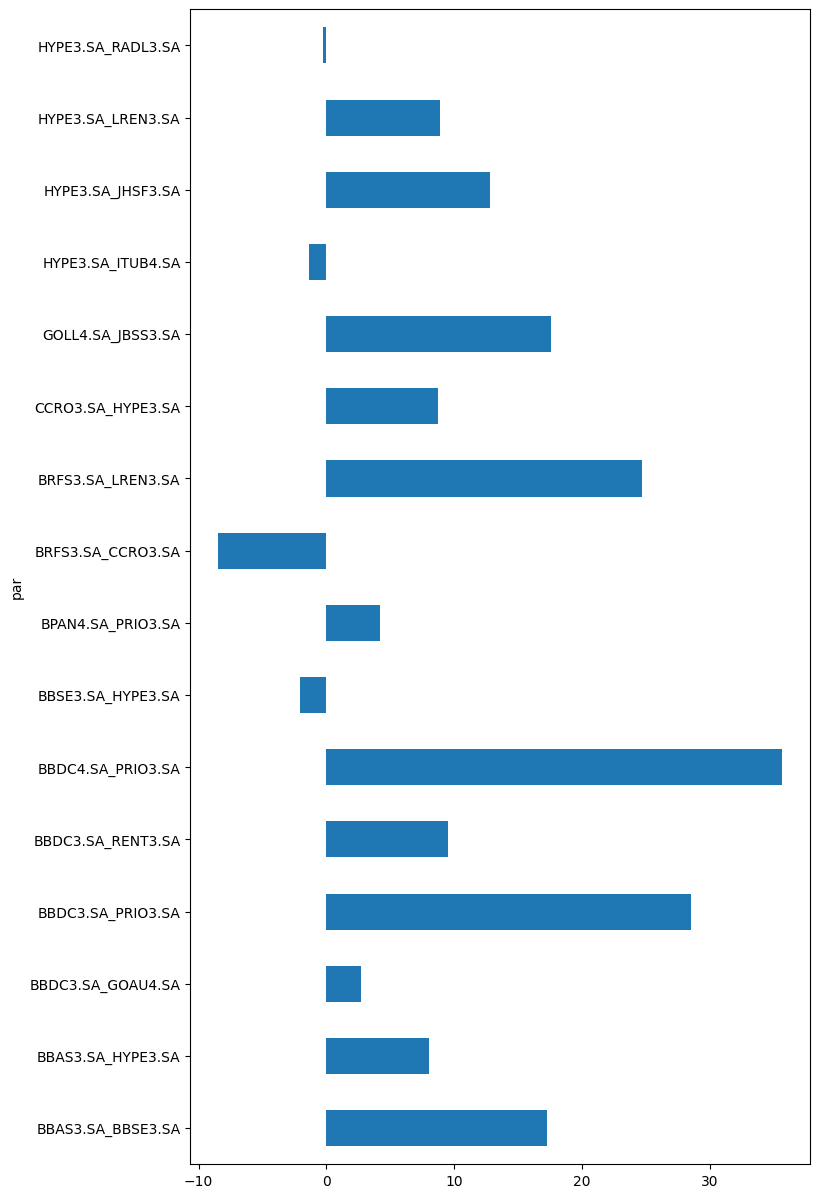

In [21]:
resultados.groupby("par")["total"].sum().mul(100).plot(kind="barh", figsize=(8, 15))

<Axes: >

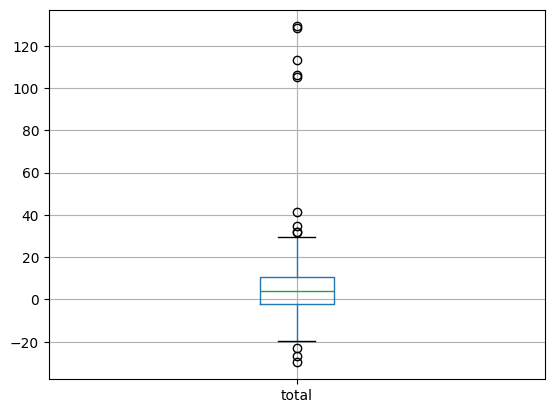

In [278]:
resultados[["total"]].mul(100).boxplot()

In [22]:
resultados[resultados.total == resultados.total.max()]

,par,entrada,saida,preco_entrada_long,preco_entrada_short,preco_saida_long,preco_saida_short,tipo,resultado_long,resultado_short,total
0,BBDC4.SA_PRIO3.SA,2022-10-19,2022-11-09,33.376392,18.100336,37.160316,13.856722,concluido,0.113371,0.234449,0.347821


<Axes: xlabel='Date'>

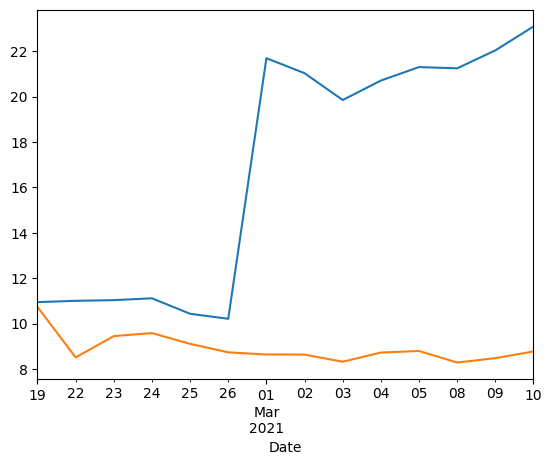

In [283]:
base_teste.loc["2021-02-19":"2021-03-10", "PCAR3.SA"].plot()
base_teste.loc["2021-02-19":"2021-03-10", "PETR4.SA"].plot()

In [287]:
ibov

MultiIndex([('Adj Close',  'ABEV3.SA'),
            ('Adj Close',  'ALPA4.SA'),
            ('Adj Close',  'AMER3.SA'),
            ('Adj Close',  'B3SA3.SA'),
            ('Adj Close',  'BBAS3.SA'),
            ('Adj Close',  'BBDC3.SA'),
            ('Adj Close',  'BBDC4.SA'),
            ('Adj Close',  'BBSE3.SA'),
            ('Adj Close',  'BEEF3.SA'),
            ('Adj Close',  'BPAN4.SA'),
            ...
            (   'Volume', 'TAEE11.SA'),
            (   'Volume',  'TIMS3.SA'),
            (   'Volume',  'TOTS3.SA'),
            (   'Volume',  'UGPA3.SA'),
            (   'Volume',  'USIM5.SA'),
            (   'Volume',  'VALE3.SA'),
            (   'Volume',  'VIIA3.SA'),
            (   'Volume',  'VIVT3.SA'),
            (   'Volume',  'WEGE3.SA'),
            (   'Volume',  'YDUQ3.SA')],
           names=['Price', 'Ticker'], length=336)

In [292]:
pcar = yf.download("PCAR3.SA", start= "2021-02-19", end="2021-03-10" )

[*********************100%%**********************]  1 of 1 completed


In [293]:
pcar

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-19,11.425628,11.844042,11.407090,11.777837,10.948235,14372820
2021-02-22,11.677206,11.957914,11.352802,11.841394,11.007316,14982292
2021-02-23,11.862579,12.022795,11.609677,11.873172,11.036855,16032820
2021-02-24,11.935405,11.993665,11.747383,11.960563,11.118090,18633839
2021-02-25,11.340885,11.648076,11.122410,11.227013,10.436210,73555065
2021-02-26,11.253495,11.654696,10.990000,10.990000,10.215891,232567365
2021-03-01,18.000000,25.610001,17.410000,23.330000,21.686691,49361500
2021-03-02,23.680000,24.500000,22.090000,22.620001,21.026703,20095700
2021-03-03,22.700001,22.830000,20.610001,21.350000,19.846159,12327200


<Axes: xlabel='entrada'>

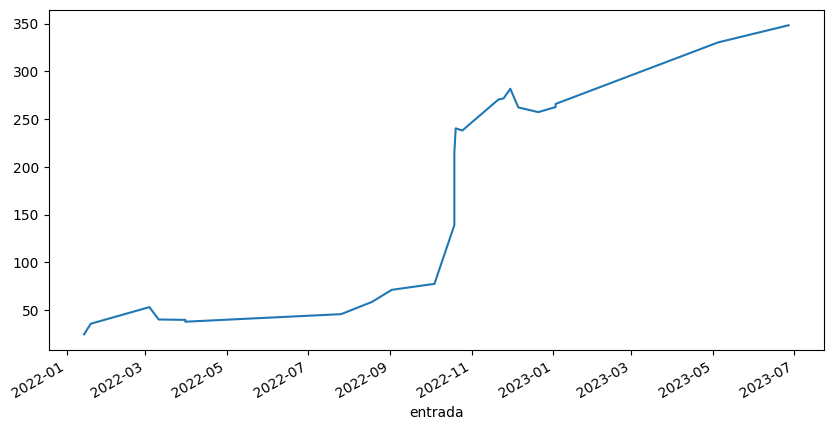

In [25]:
resultados.set_index("entrada").sort_index().total.add(1).cumprod().sub(1).mul(100).plot(figsize=(10,5))

In [130]:
base_teste

Ticker,ABEV3.SA,ALPA4.SA,AMER3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAN4.SA,...,SUZB3.SA,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,13.386031,41.159180,73.296127,18.068583,29.749983,16.407944,18.505198,22.762970,8.185863,8.548320,...,54.273487,24.588663,12.517534,26.732279,9.920060,12.484344,63.861279,37.962524,35.364742,32.807537
2021-01-05,13.671394,41.178944,71.658234,18.104143,29.441324,16.329496,18.392359,22.336988,8.022798,8.511787,...,54.024738,24.633369,12.231270,26.607092,9.837805,12.618046,64.936562,37.640247,37.535355,32.971573
2021-01-06,13.948107,38.935696,66.978508,17.807837,30.114038,16.739994,19.001944,21.972965,7.908652,8.493523,...,53.038956,24.678078,11.892959,25.345587,9.718534,13.228058,67.066216,37.218811,38.530613,31.659275
2021-01-07,13.878927,38.243946,65.623344,18.305626,31.309105,17.150490,19.506424,22.437675,7.867886,8.566586,...,57.571732,23.955320,11.702117,25.278181,10.014654,13.863139,71.444199,36.276779,40.123016,32.054897
2021-01-08,14.294000,40.220375,70.195816,18.575264,31.491137,17.018290,19.338263,23.134739,7.933112,8.740108,...,57.838902,24.476894,12.231270,26.963394,10.273759,13.796289,71.220749,37.227081,42.549549,33.145264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,13.700000,9.130000,0.930000,14.314390,53.697742,14.955887,16.715176,31.938066,7.390000,8.352396,...,54.450001,36.705753,17.729406,33.349998,25.897793,9.130000,73.674408,52.691864,36.088661,22.920000
2023-12-22,13.710000,9.500000,0.920000,14.334148,53.846104,14.993060,16.767025,32.140388,7.380000,8.488999,...,54.939999,36.971096,17.889999,32.849998,25.937241,9.280000,73.119240,53.068233,36.207664,22.280001
2023-12-26,13.770000,9.750000,0.910000,14.482330,54.340649,15.052832,16.816837,32.381248,7.500000,8.498757,...,55.220001,37.049717,17.850000,33.529999,26.006277,9.320000,73.377686,53.335651,36.415928,22.400000


In [139]:
p1, p2 = base_teste["BBAS3.SA"], base_teste["BBSE3.SA"]

In [140]:
beta, alpha, resid = ols(p1, p2)
half_life = math.ceil(calc_half_life(resid))

sigma = resid.std()
mean = resid.mean()


# avaliacao do spread acima da média
norm_resid = (resid - mean)/sigma
x = norm_resid.to_frame('norm_resid')
x['entrada_up'] = np.where((x.norm_resid >= 2) & (x.norm_resid.shift() <= 2), x.norm_resid,0 )
x['entrada_down']= np.where((x.norm_resid <= -2) & (x.norm_resid.shift() >= -2), x.norm_resid,0 )
x['saida_up'] = 0
x['saida_down'] = 0
x['p_saida_long_up'] = 0
x['p_saida_long_down'] = 0
x['p_saida_short_up'] = 0
x['p_saida_short_down'] = 0

In [141]:
resid

Date
2021-01-04   -2.647466
2021-01-05   -2.390162
2021-01-06   -1.233803
2021-01-07   -0.656155
2021-01-08   -1.400248
                ...   
2023-12-21    9.110173
2023-12-22    8.989727
2023-12-26    9.164264
2023-12-27    9.379544
2023-12-28    9.558150
Length: 745, dtype: float64

In [143]:
x

,norm_resid,entrada_up,entrada_down,saida_up,saida_down,p_saida_long_up,p_saida_long_down,p_saida_short_up,p_saida_short_down
Date,,,,,,,,,
2021-01-04,-0.588378,0.000000,0.0,0,0,0,0,0,0
2021-01-05,-0.531194,0.000000,0.0,0,0,0,0,0,0
2021-01-06,-0.274203,0.000000,0.0,0,0,0,0,0,0
2021-01-07,-0.145825,0.000000,0.0,0,0,0,0,0,0
2021-01-08,-0.311194,0.000000,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2023-12-21,2.024662,0.000000,0.0,0,0,0,0,0,0
2023-12-22,1.997894,0.000000,0.0,0,0,0,0,0,0
2023-12-26,2.036683,2.036683,0.0,0,0,0,0,0,0


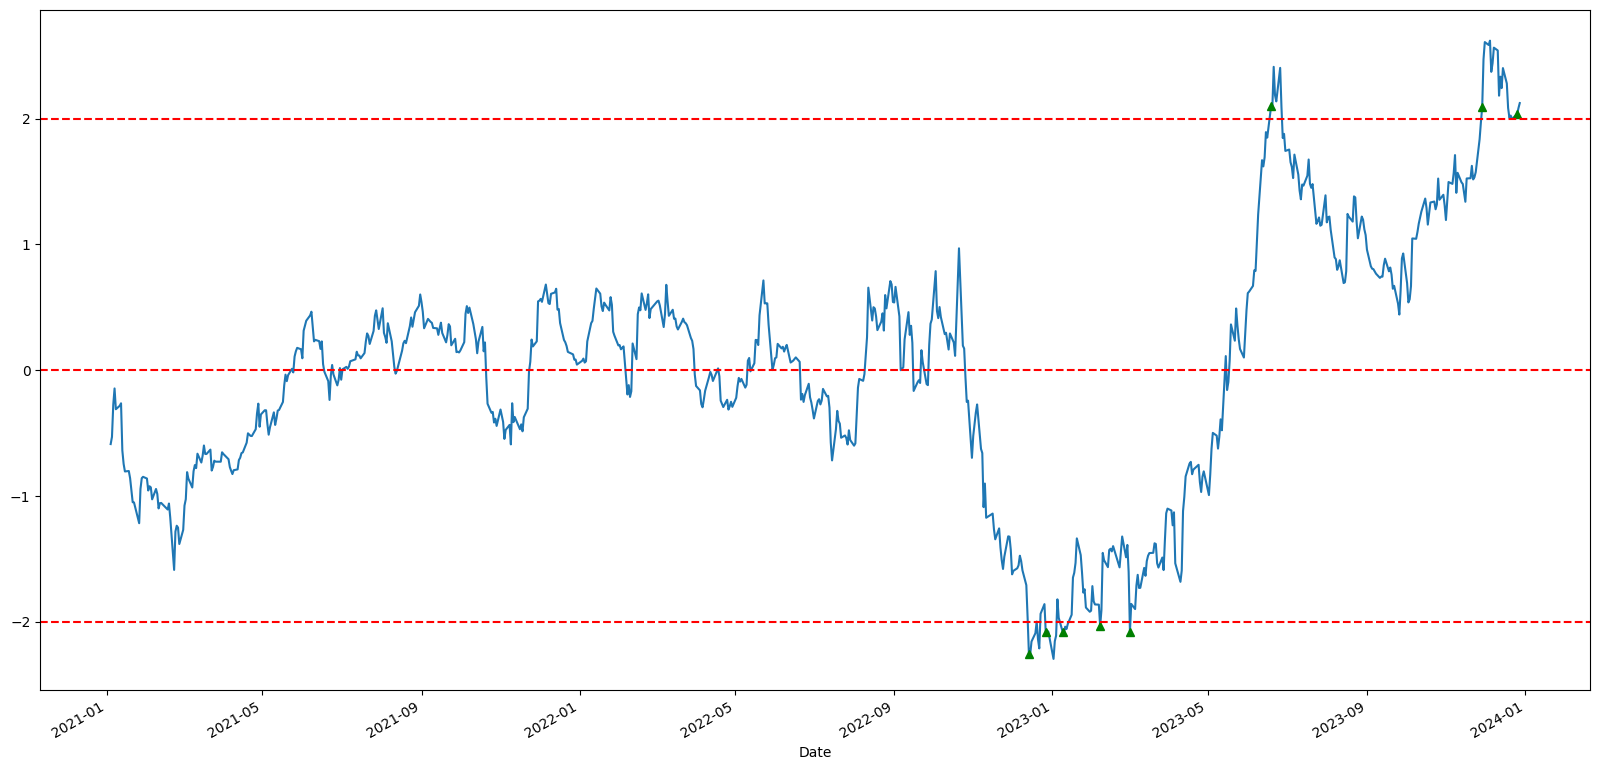

In [142]:
x.norm_resid.plot(figsize=(20,10))


x.entrada_up[(x.entrada_up != 0)].plot(color='g', linestyle='None', marker='^')
x.entrada_down[(x.entrada_down != 0)].plot(color='g', linestyle='None', marker='^')
x.saida_up[(x.saida_up != 0)].plot(color='darkblue', linestyle='None', marker='v')
x.saida_down[(x.saida_down != 0)].plot(color='darkblue', linestyle='None', marker='v')

plt.axhline(y=norm_resid.mean(), color='r', linestyle='--')
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')

In [216]:
vale_brap = yf.download(["BBAS3.SA", "ITUB4.SA"], start="2018-01-01", end="2019-01-31")

[*********************100%%**********************]  2 of 2 completed


In [217]:
vale_brap = vale_brap["Adj Close"]

In [218]:
vale_brap

Ticker,BBAS3.SA,ITUB4.SA
Date,,
2018-01-02,22.805367,21.893034
2018-01-03,23.096243,22.042719
2018-01-04,23.317842,22.501738
2018-01-05,23.317842,22.566597
2018-01-08,23.373247,22.491758
...,...,...
2019-01-23,35.543327,29.830008
2019-01-24,35.362724,29.790279
2019-01-28,34.907593,30.322674


In [219]:
beta, alpha, resid = ols(vale_brap["BBAS3.SA"], vale_brap["ITUB4.SA"])

In [220]:
stationarity_bool(resid)

True

In [221]:
norm_resid = (resid - resid.mean())/(resid.std())

<Axes: xlabel='Date'>

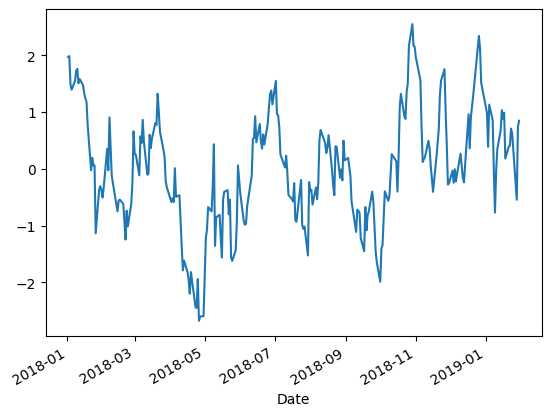

In [222]:
norm_resid.plot()